# Curve fitting using linear least squares in numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In this problem you will write a Python program to fit a curve to data using linear
least-squares. First, download the file data2.pickle.zip from the course web site.
Uncompress it (if your browser did not automatically do it). Start the Python interpreter and import the pickle module. You can then read the file data2.pickle with
the following command:

In [2]:
with open('data2.pickle', 'rb') as f:
        data = pickle.load(f, encoding='latin1')

The variable data will now contain a 2 × 50 Numpy array. Each column of the array
represents a 2-dimensional point, (ti, yi). The data is illustrated in the scatter plot in
Figure 1 below. 

Your job is to fit a trigonometric polynomial of degree 4 to this data.
Specifically, you are to estimate the coefficients x = (x0, x1, ..., x4) in the following
function:

$y(t) = x_0 + x_1sin (t) + x_2sin(2t) + x_3 sin (3t) + x_4 sin (4t)$

You should formulate this as a least-squares problem, $min_x||Ax − b||^2$, and solve for x.


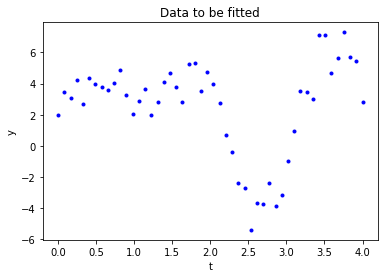

In [3]:
ti = data[0]
yi = data[1]

plt.plot(ti, yi, 'b.')
plt.title("Data to be fitted")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

## Some conceptual review before starting:

#### 1) Why is this problem considered "linear" regression if we are fitting an expression that involves sinusoidal functions?

   Answer: Notice that the sin functions are functions of t, but the equation is linear in terms of x (which is the variable   
           we are fitting.

#### 2) Why are we using trigonometric functions to fit what looks like a polynomial?

   Answer: Recall that we can use Taylor series to approximate functions using polynomials. A similar thing can be done using sinusoidal functions, by way of the Discrete Fourier Transform (note that the actual Fourier Transform has sin and cosine terms). In other words, we can approximate the function using an infinite sum of sinusoidal functions with different frequencies.

Since we don't actually know what type of equation we are dealing with, we instead take the first few terms of that infinite sum and fit that instead. The shape of our fitted curve depends on the weights we give to each of those terms in the summation. The fitting process is our attempt to find the best weights (these are our $x_0$, $x_1$, $x_2$, $x_3$,and $x_4$ values) so that the shape of our fitted function is as close as possible to the data in the figure above.

The measure of "closeness" is the least squares distance. In other words, the "best" weights/coefficients are the ones that minimize the sum of the squared distances between the data points and our fitted curve.

### (a) Construct the matrix A and the vector b from the data. 

In [4]:
#(a)

# the vector b is simply the "y" values from the data
b = data[1]


# Constructing the matrix A:

# recall that the matrix contains the terms in our function (minus the coefficients of course)
def f1(x):
    return np.sin(x)
def f2(x):
    return np.sin(2*x)
def f3(x):
    return np.sin(3*x)
def f4(x):
    return np.sin(4*x)


t = data[0]
col1 = np.ones(50)
col2 = f1(t)
col3 = f2(t)
col4 = f3(t)
col5 = f4(t)
A = np.column_stack((col1, col2, col3, col4, col5))

### (b) Use the function lstsq in numpy.linalg to solve the least-squares problem. (Note that lstsq returns several values.)

Documentation here:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

In [5]:
#(b)
x = np.linalg.lstsq(A, b)[0]


C:\Users\Juan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


### (c) Print out the estimated values of the coefficients xi.

In [6]:
#(c)
print("x0 = ", x[0])
print("x1 = ", x[1])
print("x2 = ", x[2])
print("x3 = ", x[3])
print("x4 = ", x[4])


x0 =  1.3933104193567658
x1 =  1.2624055607134144
x2 =  2.5090905088500173
x3 =  -1.8377865833334541
x4 =  2.2890978530820956


### (d) Plot the fitted polynomial (in green) using 1000 equally spaced values of t between 0 and 4. Plot the 50 data points (in blue) on top of the polynomial. 

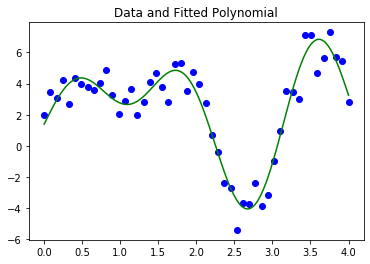

In [7]:
#(d)

# fitted polynomial
def fit(t):
    return x[0] + x[1]*f1(t) + x[2]*f2(t) + x[3]*f3(t) + x[4]*f4(t)
t2 = np.linspace(0, 4, 1000)
y = fit(t2)

plt.plot(t, b, 'bo', t2, y, 'g-')
plt.title("Data and Fitted Polynomial")
plt.show()




### (e) (2 points) Compute the error, $||Ax − b||$. If you have done everything correctly, the error should be less than 6.5.

In [8]:
#(e)
print("||Ax-b|| = ", np.linalg.norm(np.matmul(A, x)- b))

||Ax-b|| =  6.4530254890251255
